In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
 df = pd.read_csv('date_store_product_rollup_data.csv')

In [57]:
df.shape

(88291, 16)

In [58]:
df.columns

Index(['Date', 'Store_ID', 'Product_ID', 'Product_Name', 'Product_Category',
       'Product_Cost', 'Product_Price', 'Actual_Product_Price', 'Store_Name',
       'Store_City', 'Store_Location', 'Store_Open_Date', 'Units', 'Revenue',
       'xRevenue', 'Profit'],
      dtype='object')

In [59]:
df.isnull().sum()

Date                    0
Store_ID                0
Product_ID              0
Product_Name            0
Product_Category        0
Product_Cost            0
Product_Price           0
Actual_Product_Price    0
Store_Name              0
Store_City              0
Store_Location          0
Store_Open_Date         0
Units                   0
Revenue                 0
xRevenue                0
Profit                  0
dtype: int64

In [60]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
            Store_ID    Product_ID  Product_Cost  Product_Price  \
count  88291.000000  88291.000000  88291.000000   88291.000000   
mean      25.289996     15.108879      9.950154      13.984945   
std       14.362243      9.886110      7.678128       8.452158   
min        1.000000      1.000000      1.990000       2.990000   
25%       13.000000      6.000000      3.990000       7.490000   
50%       26.000000     14.000000      7.990000      13.990000   
75%       38.000000     25.000000     12.490000      17.490000   
max       50.000000     35.000000     34.990000      39.990000   

       Actual_Product_Price         Units       Revenue      xRevenue  \
count          88291.000000  88291.000000  88291.000000  88291.000000   
mean              13.549976     12.351938    162.007340    167.231858   
std                8.194984     11.031713    185.402735    191.484673   
min                2.690000      1.000000      2.690000      2.990000   
25%               

In [61]:
print("Data Types:\n", df.dtypes)

Data Types:
 Date                     object
Store_ID                  int64
Product_ID                int64
Product_Name             object
Product_Category         object
Product_Cost            float64
Product_Price           float64
Actual_Product_Price    float64
Store_Name               object
Store_City               object
Store_Location           object
Store_Open_Date          object
Units                     int64
Revenue                 float64
xRevenue                float64
Profit                  float64
dtype: object


### Top 5 items sold in each city based on category.

In [64]:
aggregated_df = df.groupby(['Store_City', 'Product_Category', 'Product_Name'], as_index=False)['Units'].sum()

# Sort each group by Store_City, Product_Category, and Units in descending order
sorted_aggregated_df = aggregated_df.sort_values(['Store_City', 'Product_Category', 'Units'], ascending=[True, True, False])

# Extract the top 5 selling items for each product category in each city
top_5_per_city_category = sorted_aggregated_df.groupby(['Store_City', 'Product_Category']).head(5).reset_index(drop=True)

# Display the result
print(top_5_per_city_category)

         Store_City Product_Category      Product_Name  Units
0    Aguascalientes     Art & Crafts   Barrel O' Slime   1584
1    Aguascalientes     Art & Crafts       PlayDoh Can   1189
2    Aguascalientes     Art & Crafts        Magic Sand    656
3    Aguascalientes     Art & Crafts   PlayDoh Toolkit    343
4    Aguascalientes     Art & Crafts   Kids Makeup Kit    216
..              ...              ...               ...    ...
655       Zacatecas             Toys     Action Figure   1017
656       Zacatecas             Toys       Lego Bricks    981
657       Zacatecas             Toys  Dinosaur Figures    754
658       Zacatecas             Toys    Animal Figures    635
659       Zacatecas             Toys          Dino Egg    513

[660 rows x 4 columns]


### Top 5 items sold every month 

In [66]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract month-year from the 'Date' column
df['Month-Year'] = df['Date'].dt.to_period('M')

# Group by Month-Year and Product_Name, then sum the Units
grouped_df = df.groupby(['Month-Year', 'Product_Name', 'Product_Category'], as_index=False)['Units'].sum()

# Sort the grouped data by Month-Year and Units in descending order
sorted_grouped = grouped_df.sort_values(['Month-Year', 'Units'], ascending=[True, False])

# Extract the top selling items for each Month-Year based on units sold
top_items_per_month_year = sorted_grouped.groupby('Month-Year').head(5).reset_index(drop=True)

# Display the result
print(top_items_per_month_year)

    Month-Year     Product_Name Product_Category  Units
0      2022-01        Colorbuds      Electronics   8110
1      2022-01    Deck Of Cards            Games   4413
2      2022-01    Action Figure             Toys   3441
3      2022-01         Dino Egg             Toys   2882
4      2022-01     Rubik's Cube            Games   1934
..         ...              ...              ...    ...
100    2023-09      PlayDoh Can     Art & Crafts   5825
101    2023-09  Barrel O' Slime     Art & Crafts   5253
102    2023-09       Magic Sand     Art & Crafts   4523
103    2023-09    Deck Of Cards            Games   2973
104    2023-09         Playfoam     Art & Crafts   2847

[105 rows x 4 columns]


### Top 5 items sold in every store.

In [67]:
grouped_df = df.groupby(['Store_Name', 'Product_Name'], as_index=False)['Units'].sum()

# Sort the grouped data by Store_Name and Units in descending order
sorted_grouped = grouped_df.sort_values(['Store_Name', 'Units'], ascending=[True, False])

# Extract the top selling items for each Store based on units sold
top_items_per_store = sorted_grouped.groupby('Store_Name').head(5).reset_index(drop=True)

# Display the result
print(top_items_per_store)

                      Store_Name     Product_Name  Units
0    Maven Toys Aguascalientes 1        Colorbuds   2096
1    Maven Toys Aguascalientes 1    Deck Of Cards   1754
2    Maven Toys Aguascalientes 1  Barrel O' Slime   1584
3    Maven Toys Aguascalientes 1      PlayDoh Can   1189
4    Maven Toys Aguascalientes 1      Lego Bricks   1021
..                           ...              ...    ...
245       Maven Toys Zacatecas 1  Barrel O' Slime   2138
246       Maven Toys Zacatecas 1      PlayDoh Can   1768
247       Maven Toys Zacatecas 1       Magic Sand   1739
248       Maven Toys Zacatecas 1    Action Figure   1017
249       Maven Toys Zacatecas 1        Colorbuds    993

[250 rows x 3 columns]


### Top 5 profitable items sold in the city

In [68]:
profit_df = df.groupby(['Store_City', 'Product_Name'], as_index=False)['Profit'].sum()

# Sort the profit DataFrame by Store_City and Profit in descending order
sorted_profit_df = profit_df.sort_values(['Store_City', 'Profit'], ascending=[True, False])

# Retrieve the top 5 profitable items for each city
top_5_profitable_per_city = sorted_profit_df.groupby('Store_City').head(5).reset_index(drop=True)

# Display the result
print(top_5_profitable_per_city)

         Store_City     Product_Name    Profit
0    Aguascalientes        Colorbuds  16080.90
1    Aguascalientes    Deck Of Cards   5227.99
2    Aguascalientes    Action Figure   4502.36
3    Aguascalientes  Barrel O' Slime   3748.30
4    Aguascalientes      Lego Bricks   3194.25
..              ...              ...       ...
140       Zacatecas        Colorbuds   7809.37
141       Zacatecas    Action Figure   6030.62
142       Zacatecas  Barrel O' Slime   5004.88
143       Zacatecas       Magic Sand   3325.48
144       Zacatecas      Lego Bricks   3253.87

[145 rows x 3 columns]


### Top 5 profitable items sold every month

In [69]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract month-year from the 'Date' column
df['Month-Year'] = df['Date'].dt.to_period('M')

# Group by Month-Year and Product_Name, then sum the Profit
profit_grouped = df.groupby(['Month-Year', 'Product_Name'], as_index=False)['Profit'].sum()

# Sort the results by Month-Year and Profit in descending order
sorted_profit_grouped = profit_grouped.sort_values(['Month-Year', 'Profit'], ascending=[True, False])

# Extract the top 5 profitable items for each Month-Year based on Profit
top_profitable_per_month = sorted_profit_grouped.groupby('Month-Year').head(5).reset_index(drop=True)

# Display the result
print(top_profitable_per_month)

    Month-Year        Product_Name    Profit
0      2022-01           Colorbuds  61878.03
1      2022-01       Action Figure  19583.93
2      2022-01       Deck Of Cards  12725.57
3      2022-01       Glass Marbles   8632.06
4      2022-01            Dart Gun   6377.40
..         ...                 ...       ...
100    2023-09           Colorbuds  21750.55
101    2023-09            Playfoam  19188.69
102    2023-09     Barrel O' Slime  14938.94
103    2023-09  Mini Ping Pong Set  10648.37
104    2023-09       Action Figure  10625.47

[105 rows x 3 columns]


### Top 5 profitable items sold by category.

In [70]:
df['Profit'] = df['Profit'].astype(float)

# Group by Product_Category and Product_Name, then sum the Profit
grouped_df = df.groupby(['Product_Category', 'Product_Name'], as_index=False)['Profit'].sum()

# Sort the grouped data by Product_Category and Profit in descending order
sorted_grouped = grouped_df.sort_values(['Product_Category', 'Profit'], ascending=[True, False])

# Extract the top 5 profitable items for each Product_Category based on Profit
top_5_profitable_per_category = sorted_grouped.groupby('Product_Category').head(5).reset_index(drop=True)

# Display the result
print(top_5_profitable_per_category)

     Product_Category          Product_Name     Profit
0        Art & Crafts       Barrel O' Slime  217607.83
1        Art & Crafts       Kids Makeup Kit  141317.71
2        Art & Crafts         Etch A Sketch  121820.34
3        Art & Crafts            Magic Sand  117120.16
4        Art & Crafts           PlayDoh Can  104238.90
5         Electronics             Colorbuds  806518.64
6         Electronics      Gamer Headphones  106644.95
7         Electronics             Toy Robot   51845.89
8               Games         Deck Of Cards  251917.38
9               Games         Glass Marbles  182989.35
10              Games                 Jenga   88307.73
11              Games          Rubik's Cube   77297.90
12              Games              Monopoly   16407.08
13  Sports & Outdoors    Mini Ping Pong Set  127053.38
14  Sports & Outdoors              Dart Gun  121690.58
15  Sports & Outdoors              Nerf Gun  108160.29
16  Sports & Outdoors          Splash Balls   53710.84
17  Sports

### Top 5 profitable items in every store

In [71]:
# Group by Store_Name and Product_Name, then sum the Profit
grouped_df = df.groupby(['Store_Name', 'Product_Name'], as_index=False)['Profit'].sum()

# Sort the grouped data by Store_Name and Profit in descending order
sorted_grouped = grouped_df.sort_values(['Store_Name', 'Profit'], ascending=[True, False])

# Extract the top 5 profitable items for each Store based on Profit
top_5_profitable_per_store = sorted_grouped.groupby('Store_Name').head(5).reset_index(drop=True)

# Display the result
print(top_5_profitable_per_store)

                      Store_Name     Product_Name    Profit
0    Maven Toys Aguascalientes 1        Colorbuds  16080.90
1    Maven Toys Aguascalientes 1    Deck Of Cards   5227.99
2    Maven Toys Aguascalientes 1    Action Figure   4502.36
3    Maven Toys Aguascalientes 1  Barrel O' Slime   3748.30
4    Maven Toys Aguascalientes 1      Lego Bricks   3194.25
..                           ...              ...       ...
245       Maven Toys Zacatecas 1        Colorbuds   7809.37
246       Maven Toys Zacatecas 1    Action Figure   6030.62
247       Maven Toys Zacatecas 1  Barrel O' Slime   5004.88
248       Maven Toys Zacatecas 1       Magic Sand   3325.48
249       Maven Toys Zacatecas 1      Lego Bricks   3253.87

[250 rows x 3 columns]


### Identify top revenue generating items based on city

In [73]:
# Group by Store_City and Product_Name, then sum the Revenue
revenue_df = df.groupby(['Store_City', 'Product_Name'], as_index=False)['Revenue'].sum()

# Sort the grouped data by Store_City and Revenue in descending order
sorted_revenue_df = revenue_df.sort_values(['Store_City', 'Revenue'], ascending=[True, False])

# Extract the top 3 revenue-generating items for each city
top_3_revenue_per_city = sorted_revenue_df.groupby('Store_City').head(3).reset_index(drop=True)

# Display the result
print(top_3_revenue_per_city)


        Store_City        Product_Name   Revenue
0   Aguascalientes         Lego Bricks  38919.04
1   Aguascalientes           Colorbuds  31078.14
2   Aguascalientes        Rubik's Cube  16895.25
3         Campeche         Lego Bricks  55028.17
4         Campeche  Mini Ping Pong Set  54131.70
..             ...                 ...       ...
82          Xalapa           Colorbuds  59530.71
83          Xalapa          Magic Sand  46020.18
84       Zacatecas         Lego Bricks  37579.06
85       Zacatecas          Magic Sand  27654.09
86       Zacatecas       Action Figure  16828.45

[87 rows x 3 columns]


### Identify top revenue generating items based on month

In [75]:
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for Month-Year extracted from the 'Date' column
df['Month-Year'] = df['Date'].dt.to_period('M')

# Group the data by Month-Year and Product_Name, then sum the Revenue for each product
revenue_grouped = df.groupby(['Month-Year', 'Product_Name'], as_index=False)['Revenue'].sum()

# Sort the grouped data by Month-Year and Revenue in descending order
sorted_revenue = revenue_grouped.sort_values(['Month-Year', 'Revenue'], ascending=[True, False])

# Retrieve the top 3 revenue-generating items for each Month-Year
top_3_revenue_per_month = sorted_revenue.groupby('Month-Year').head(3).reset_index(drop=True)

# Display the result
print(top_3_revenue_per_month)

   Month-Year   Product_Name    Revenue
0     2022-01      Colorbuds  118566.93
1     2022-01    Lego Bricks   66345.29
2     2022-01  Action Figure   53959.52
3     2022-02      Colorbuds  108942.51
4     2022-02    Lego Bricks   90246.24
..        ...            ...        ...
58    2023-08     Magic Sand   65963.70
59    2023-08      Colorbuds   51182.86
60    2023-09    Lego Bricks   89406.97
61    2023-09     Magic Sand   72256.25
62    2023-09      Colorbuds   41439.01

[63 rows x 3 columns]


### Top revenue generating items based on Category

In [76]:
import pandas as pd

# Load the dataset from the provided CSV file
file_path = 'date_store_product_rollup_data.csv'
df = pd.read_csv(file_path)

# Group by Product_Category and Product_Name, then sum the Revenue
revenue_grouped = df.groupby(['Product_Category', 'Product_Name'], as_index=False)['Revenue'].sum()

# Sort the grouped data by Product_Category and Revenue in descending order
sorted_revenue = revenue_grouped.sort_values(['Product_Category', 'Revenue'], ascending=[True, False])

# Extract the top 3 revenue-generating items for each category
top_3_revenue_per_category = sorted_revenue.groupby('Product_Category').head(3).reset_index(drop=True)

# Display the result
print(top_3_revenue_per_category)

     Product_Category      Product_Name     Revenue
0        Art & Crafts        Magic Sand   964886.18
1        Art & Crafts   Kids Makeup Kit   486258.38
2        Art & Crafts   Barrel O' Slime   400017.20
3         Electronics         Colorbuds  1553544.56
4         Electronics  Gamer Headphones   375835.37
5         Electronics         Toy Robot   303303.40
6               Games      Rubik's Cube   859579.58
7               Games     Deck Of Cards   598158.24
8               Games     Glass Marbles   407722.17
9   Sports & Outdoors      Splash Balls   535092.36
10  Sports & Outdoors          Nerf Gun   506039.86
11  Sports & Outdoors          Dart Gun   505554.70
12               Toys       Lego Bricks  2281878.62
13               Toys     Action Figure   963467.73
14               Toys    Animal Figures   513500.68


### Identify top items by revenue based on store

In [77]:
# Group by Store_Name and Product_Name, then sum the Revenue
revenue_grouped = df.groupby(['Store_Name', 'Product_Name'], as_index=False)['Revenue'].sum()

# Sort the grouped data by Store_Name and Revenue in descending order
sorted_revenue = revenue_grouped.sort_values(['Store_Name', 'Revenue'], ascending=[True, False])

# Extract the top 3 revenue-generating items for each store
top_3_revenue_per_store = sorted_revenue.groupby('Store_Name').head(3).reset_index(drop=True)

# Display the result
print(top_3_revenue_per_store)

                      Store_Name        Product_Name   Revenue
0    Maven Toys Aguascalientes 1         Lego Bricks  38919.04
1    Maven Toys Aguascalientes 1           Colorbuds  31078.14
2    Maven Toys Aguascalientes 1        Rubik's Cube  16895.25
3          Maven Toys Campeche 1  Mini Ping Pong Set  44416.52
4          Maven Toys Campeche 1         Lego Bricks  30449.65
..                           ...                 ...       ...
145          Maven Toys Xalapa 2          Magic Sand  30085.64
146          Maven Toys Xalapa 2           Colorbuds  27633.72
147       Maven Toys Zacatecas 1         Lego Bricks  37579.06
148       Maven Toys Zacatecas 1          Magic Sand  27654.09
149       Maven Toys Zacatecas 1       Action Figure  16828.45

[150 rows x 3 columns]


### What items after Frequently bought together in a store(day wise) [Data needs to be grouped by date, store, product id.]

In [80]:
from itertools import combinations
from collections import Counter

# Group the data by Date, Store_ID, and Product_ID
grouped = df.groupby(['Date', 'Store_ID', 'Product_ID'], as_index=False)['Units'].sum()

# Create a dictionary to store product combinations for each store on each day
product_combinations = {}

# Iterate through each unique date and store combination
for (date, store_id), group in grouped.groupby(['Date', 'Store_ID']):
    # Get the list of product IDs sold on that day in that store
    products = group['Product_ID'].tolist()
    # Generate all combinations of products (pairs)
    combs = combinations(products, 2)
    # Count each combination in a Counter dictionary
    if (date, store_id) not in product_combinations:
        product_combinations[(date, store_id)] = Counter()
    product_combinations[(date, store_id)].update(combs)

# Display the top combinations for each day and store
for key, counter in product_combinations.items():
    date, store_id = key
    print(f"Date: {date}, Store ID: {store_id}")
    for comb, count in counter.most_common(5):  # Display top 5 combinations
        print(f"Products {comb} were bought together {count} times")

Date: 2022-01-01, Store ID: 1
Products (21, 31) were bought together 1 times
Products (21, 34) were bought together 1 times
Products (31, 34) were bought together 1 times
Date: 2022-01-01, Store ID: 2
Date: 2022-01-01, Store ID: 3
Products (8, 24) were bought together 1 times
Date: 2022-01-01, Store ID: 4
Products (1, 8) were bought together 1 times
Products (1, 9) were bought together 1 times
Products (1, 20) were bought together 1 times
Products (8, 9) were bought together 1 times
Products (8, 20) were bought together 1 times
Date: 2022-01-01, Store ID: 5
Products (6, 7) were bought together 1 times
Products (6, 8) were bought together 1 times
Products (6, 21) were bought together 1 times
Products (6, 31) were bought together 1 times
Products (7, 8) were bought together 1 times
Date: 2022-01-01, Store ID: 6
Products (3, 6) were bought together 1 times
Products (3, 8) were bought together 1 times
Products (3, 25) were bought together 1 times
Products (6, 8) were bought together 1 time

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Least selling items every quarter year. 

In [81]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and quarter from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

# Create a 'Quarter_Year' column for grouping
df['Quarter_Year'] = df['Year'].astype(str) + ' Q' + df['Quarter'].astype(str)

# Group by Quarter_Year and Product_ID, then sum the Units
quarterly_sales = df.groupby(['Quarter_Year', 'Product_ID'], as_index=False)['Units'].sum()

# Identify the least selling item in every quarter
least_selling_items = quarterly_sales.groupby('Quarter_Year').apply(lambda x: x.nsmallest(1, 'Units')).reset_index(drop=True)

# Merge with original data to get product names
least_selling_details = least_selling_items.merge(df[['Product_ID', 'Product_Name']].drop_duplicates(), on='Product_ID', how='left')

# Display the least selling items with details
print(least_selling_details)

  Quarter_Year  Product_ID  Units          Product_Name
0      2022 Q1          35     66         Uno Card Game
1      2022 Q2           4    198      Chutes & Ladders
2      2022 Q3           9     28              Dino Egg
3      2022 Q4           9    332              Dino Egg
4      2023 Q1          20    375  Mini Basketball Hoop
5      2023 Q2          20    300  Mini Basketball Hoop
6      2023 Q3          20    235  Mini Basketball Hoop


C:\Users\vinay\AppData\Local\Temp\ipykernel_146092\1398319219.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  least_selling_items = quarterly_sales.groupby('Quarter_Year').apply(lambda x: x.nsmallest(1, 'Units')).reset_index(drop=True)


### Number of stores in each city.

In [82]:
# Group the data by Store_City and count the unique Store_IDs in each city
stores_per_city = df.groupby('Store_City')['Store_ID'].nunique().reset_index()

# Rename columns for clarity
stores_per_city.columns = ['City', 'Number of Stores']

# Display the result
print(stores_per_city)

                City  Number of Stores
0     Aguascalientes                 1
1           Campeche                 2
2           Chetumal                 1
3          Chihuahua                 2
4       Chilpancingo                 1
5    Ciudad Victoria                 1
6         Cuernavaca                 1
7   Cuidad de Mexico                 4
8           Culiacan                 1
9            Durango                 1
10       Guadalajara                 4
11        Guanajuato                 3
12        Hermosillo                 3
13            La Paz                 1
14            Merida                 1
15          Mexicali                 2
16         Monterrey                 4
17           Morelia                 1
18            Oaxaca                 1
19           Pachuca                 1
20            Puebla                 3
21          Saltillo                 2
22   San Luis Potosi                 1
23          Santiago                 1
24            Toluca     

### Graph for Date (Quarter-year) vs Prices

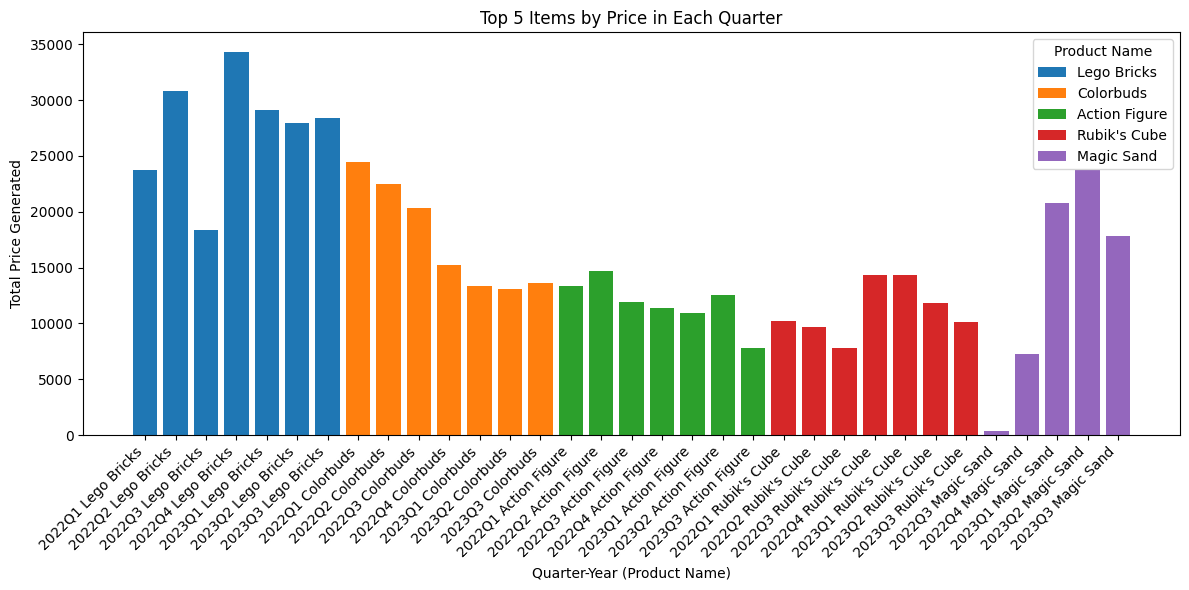

In [91]:
df['Quarter-Year'] = df['Date'].dt.to_period('Q').astype(str)

# Group by Product_Name and sum the Product_Price to find top 5 items
top_items = df.groupby('Product_Name')['Product_Price'].sum().nlargest(5).index

# Filter the DataFrame for only these top 5 items
filtered_df = df[df['Product_Name'].isin(top_items)]

# Group by Quarter-Year and Product_Name, then sum the Product_Price
grouped_df = filtered_df.groupby(['Quarter-Year', 'Product_Name'], as_index=False)['Product_Price'].sum()

# Plotting
plt.figure(figsize=(12, 6))
for product in top_items:
    product_data = grouped_df[grouped_df['Product_Name'] == product]
    plt.bar(product_data['Quarter-Year'] + ' ' + product, product_data['Product_Price'], label=product)

plt.title('Top 5 Items by Price in Each Quarter')
plt.xlabel('Quarter-Year (Product Name)')
plt.ylabel('Total Price Generated')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()

### Graph for Date vs Revenue 

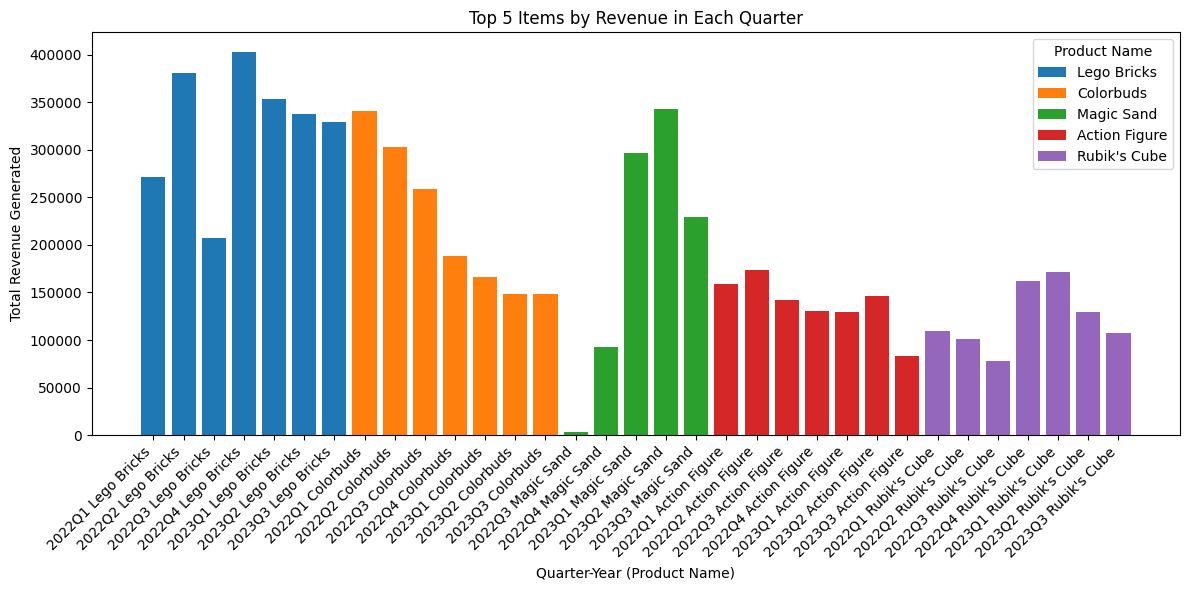

In [93]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract Quarter-Year from the 'Date' column
df['Quarter-Year'] = df['Date'].dt.to_period('Q').astype(str)

# Group by Product_Name and sum the Product_Price to find top 5 items
top_items = df.groupby('Product_Name')['Revenue'].sum().nlargest(5).index

# Filter the DataFrame for only these top 5 items
filtered_df = df[df['Product_Name'].isin(top_items)]

# Group by Quarter-Year and Product_Name, then sum the Product_Price
grouped_df = filtered_df.groupby(['Quarter-Year', 'Product_Name'], as_index=False)['Revenue'].sum()

# Plotting
plt.figure(figsize=(12, 6))
for product in top_items:
    product_data = grouped_df[grouped_df['Product_Name'] == product]
    plt.bar(product_data['Quarter-Year'] + ' ' + product, product_data['Revenue'], label=product)

plt.title('Top 5 Items by Revenue in Each Quarter')
plt.xlabel('Quarter-Year (Product Name)')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()

### Graph for Date vs Profit

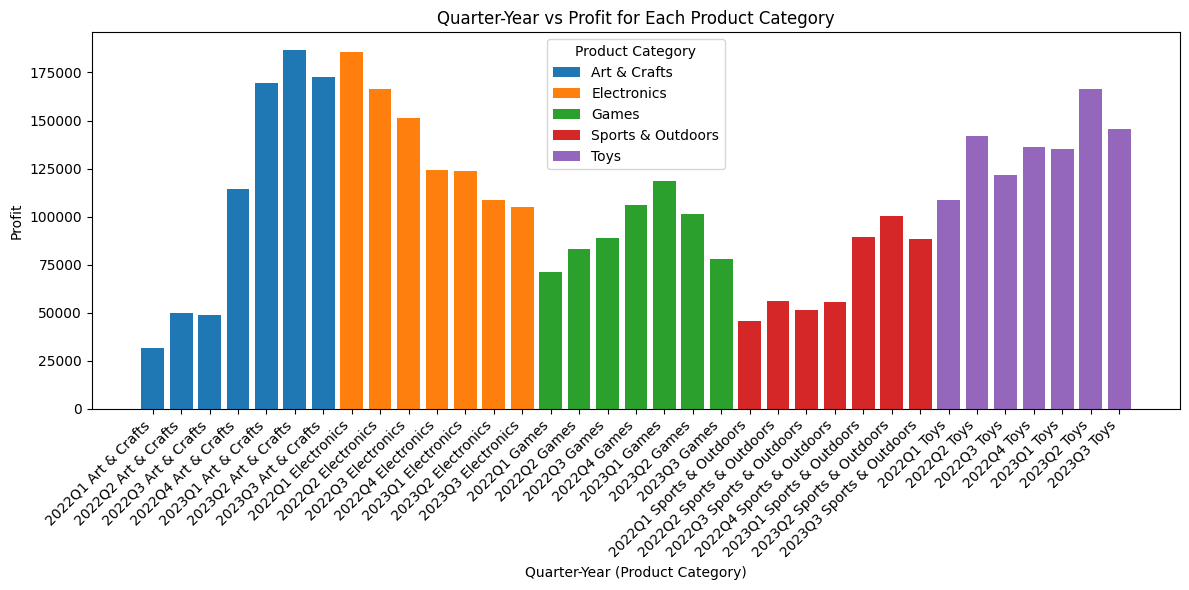

In [96]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract Quarter-Year from the 'Date' column
df['Quarter-Year'] = df['Date'].dt.to_period('Q').astype(str)

# Group by Quarter-Year and Product_Category, then sum the Profit
grouped_profit = df.groupby(['Quarter-Year', 'Product_Category'], as_index=False)['Profit'].sum()

# Plotting
plt.figure(figsize=(12, 6))
for category in grouped_profit['Product_Category'].unique():
    subset = grouped_profit[grouped_profit['Product_Category'] == category]
    plt.bar(subset['Quarter-Year'] + ' ' + category, subset['Profit'], label=category)

plt.title('Quarter-Year vs Profit for Each Product Category')
plt.xlabel('Quarter-Year (Product Category)')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

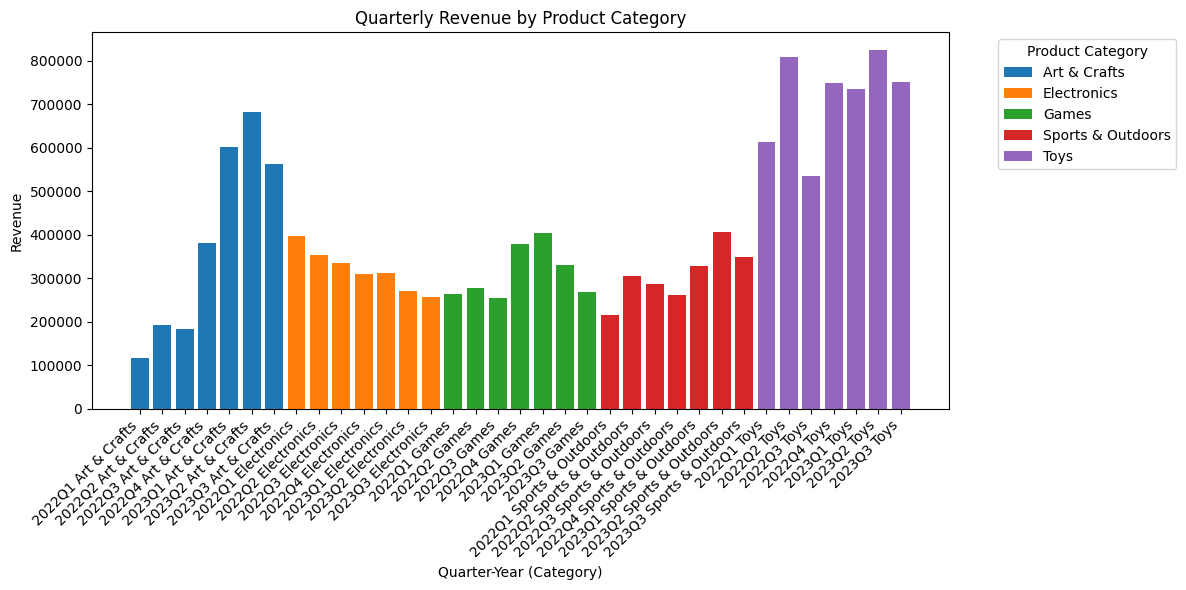

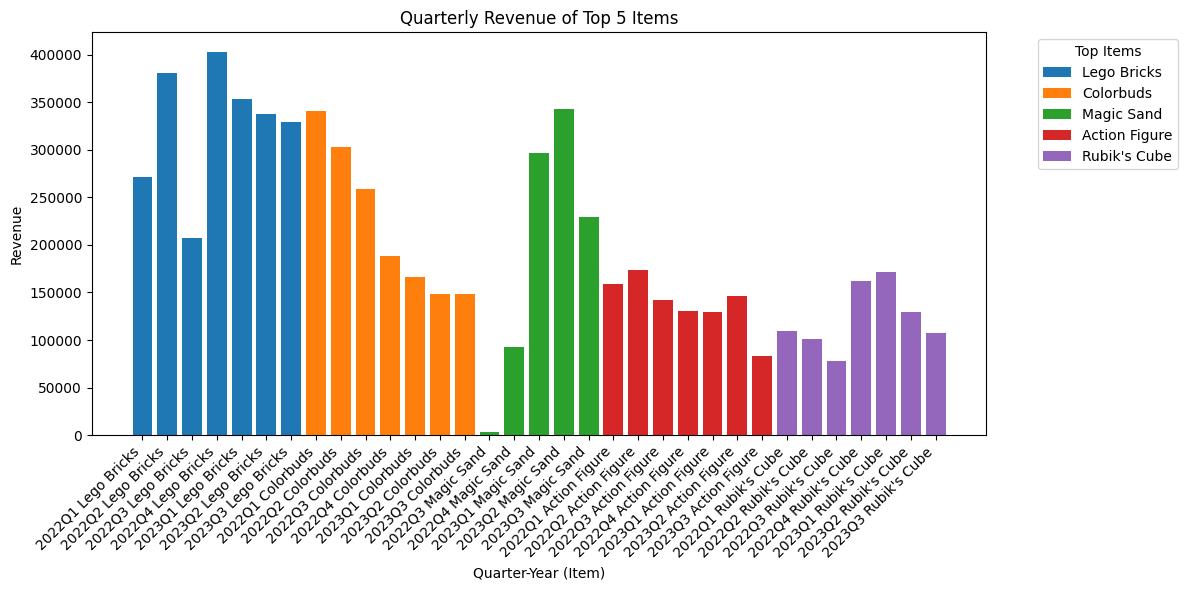

In [100]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Quarter-Year from the 'Date' column
df['Quarter-Year'] = df['Date'].dt.to_period('Q').astype(str)

# Revenue by Product Category Over Quarters
category_revenue = df.groupby(['Quarter-Year', 'Product_Category'], as_index=False)['Revenue'].sum()

plt.figure(figsize=(12, 6))
for category in category_revenue['Product_Category'].unique():
    subset = category_revenue[category_revenue['Product_Category'] == category]
    plt.bar(subset['Quarter-Year'] + ' ' + category, subset['Revenue'], label=category)
plt.title('Quarterly Revenue by Product Category')
plt.xlabel('Quarter-Year (Category)')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Revenue of Top Items Over Quarters
top_items = df.groupby('Product_Name', as_index=False)['Revenue'].sum().nlargest(5, 'Revenue')['Product_Name']
filtered_df = df[df['Product_Name'].isin(top_items)]
top_items_revenue = filtered_df.groupby(['Quarter-Year', 'Product_Name'], as_index=False)['Revenue'].sum()

plt.figure(figsize=(12, 6))
for item in top_items:
    subset = top_items_revenue[top_items_revenue['Product_Name'] == item]
    plt.bar(subset['Quarter-Year'] + ' ' + item, subset['Revenue'], label=item)
plt.title('Quarterly Revenue of Top 5 Items')
plt.xlabel('Quarter-Year (Item)')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Top Items', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


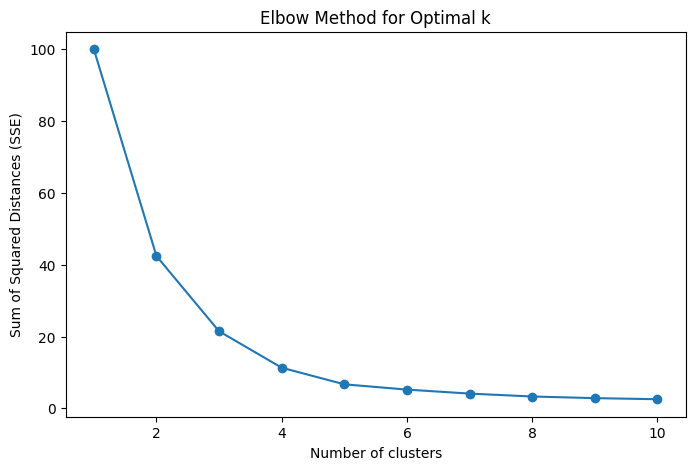

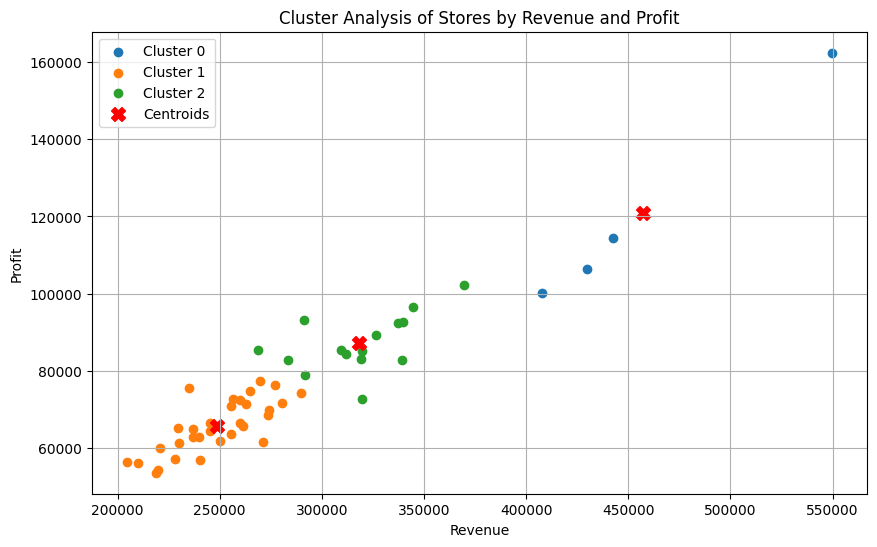

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

store_data = df.groupby('Store_ID').agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

# Prepare the features for clustering
X = store_data[['Revenue', 'Profit']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the Elbow Method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

# Choose the optimal number of clusters (e.g., 3 based on the elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original data
store_data['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    clustered_data = store_data[store_data['Cluster'] == cluster]
    plt.scatter(clustered_data['Revenue'], clustered_data['Profit'], label=f'Cluster {cluster}')

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids', marker='X')

plt.title('Cluster Analysis of Stores by Revenue and Profit')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()